<font face="Bookman Old Style"><font size="4"><b>Question</b><br>
    <font size="3">Implement at least one of the parametric and non-parametric model in your domain. Specify your problem statement, aim and inference clearly.

<font face="Bookman Old Style"><font size="4"><b>Parametric model</b><br>
    <font size="3">- A learning model that summarizes data with a set of fixed-size parameters (independent on the number of instances of training).Parametric machine learning algorithms are which optimizes the function to a known form. <br>- In a parametric model, you know exactly which model you are going to fit in with the data, for example, linear regression line.
        <center>$b_0 + b_1*x_1 + b_2*x_2 = 0$</center><br>
where,<br>
        <center>$b_0, b_1, b_2$ → the coefficients of the line that control the intercept and slope<br>$x_1, x_2$ → input variables</center><br>- Some more examples of parametric machine learning algorithms include:<br>
Logistic Regression<br>
Linear Discriminant Analysis<br>
Perceptron<br>
Naive Bayes<br>
Simple Neural Networks

<font face="Bookman Old Style"><font size="4"><b>Non-Parametric model</b><br>
    <font size="3">- Nonparametric machine learning algorithms are those which do not make specific assumptions about the type of the mapping function. They are prepared to choose any functional form from the training data, by not making assumptions.<br>- The word nonparametric does not mean that the value lacks parameters existing in it, but rather that the parameters are adjustable and can change.<Br>- Some examples of popular nonparametric machine learning algorithms are:<br>
k-Nearest Neighbors<br>
Decision Trees like CART and C4.5<br>
Support Vector Machines

<font face="Bookman Old Style"><font size="4"><b>Model Implemented on dataset</b><br>
    <font size="3">- Our aim is to find the risk related to the cancer types.<br>- For this we can use two different test, one parametric and one non-parametric.<br>- The most suitable ones are:<br>1. Multiple Liner regression<br>2. Decision Tree

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Bad key text.latex.preview in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
# Reading the dataset
data = pd.read_csv("C:/Users/Prerana Murthy/Documents/Christ/MSc/SEM 2/Machine learning/cancer_data.csv")
data

,cancer_type,new_cases_number,new_cases_rank,new_case_percent,new_cases_cum_risk,Deaths Number,death_rank,death_percentage,Deaths_cum_risk,risk_of_prevalence_5yr,per100k_5yr_prevalence
0,Anus,5452,30,0.41,0.05,2776,29,0.33,0.03,12278,0.89
1,Bladder,21096,17,1.60,0.19,11154,21,1.30,0.10,49257,3.57
2,"Brain, central nervous system",31460,14,2.40,0.22,26656,10,3.10,0.20,74398,5.39
3,Breast,178361,1,13.50,2.81,90408,1,10.60,1.49,459271,69.28
4,Cervix uteri,123907,3,9.40,2.01,77348,2,9.10,1.30,283842,42.82
5,Colon,31646,13,2.40,0.28,19236,13,2.30,0.17,65493,4.75
6,Corpus uteri,16413,22,1.20,0.29,6385,23,0.75,0.11,43484,6.56
7,Gallbladder,19570,20,1.50,0.17,14736,16,1.70,0.13,25138,1.82
8,Hodgkin lymphoma,9221,26,0.70,0.06,3513,28,0.41,0.03,24928,1.81
9,Hypopharynx,28489,15,2.20,0.26,11443,20,1.30,0.11,39750,2.88


In [3]:
#Ml model
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['cancer_type'] = encoder.fit_transform(data['cancer_type'])
data['cancer_type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

In [4]:
data.rename(columns={'risk_of_prevalence_5yr':'Risk'},inplace=True)
data.dtypes

cancer_type                 int32
new_cases_number            int64
new_cases_rank              int64
new_case_percent          float64
new_cases_cum_risk        float64
Deaths Number               int64
death_rank                  int64
death_percentage          float64
Deaths_cum_risk           float64
Risk                        int64
per100k_5yr_prevalence    float64
dtype: object

In [5]:
y = data['Risk']
x = data.drop('Risk',axis=1)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

<b> 1. Non-Parametric test -Decision tree 

In [7]:
#1. Non-Parametric test -Decision tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [8]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse
print("RMSE: ", mse**(1/2.0),"MSE: ",mse) 

RMSE:  66228.81921162922 MSE:  4386256494.166667


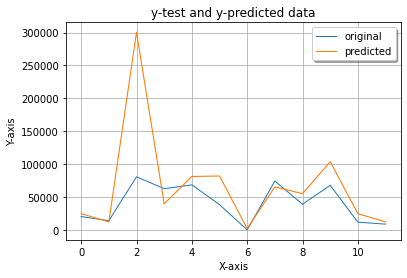

In [9]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

<b> 2. Parametric test - Multiple liner regression

In [10]:
#2. Parametric test - MultipleLinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [11]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse
print("RMSE: ", mse**(1/2.0),"MSE: ",mse)

RMSE:  8224.258747585309 MSE:  67638431.94723347


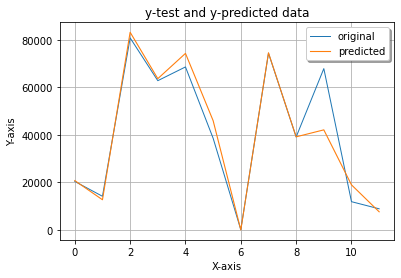

In [12]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

<font face="Bookman Old Style"><font size="4"><b>Conclusion</b><br>
    <font size="3">- We can see that the RMSE score for multiple linear regression model is much lesser than that of decision tree, hence we can say that the parametric test we a better model.